# Old Code

## Before Applying Ethics (old please ignore )


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import tensorflow as tf
# import pandas as pd
# import numpy as np



# # Read the Data

# data = pd.read_csv('/content/KaggleV2-May-2016.csv')
# data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
# data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# # Drop unnecessary columns
# processed_data = data.drop(['PatientId', 'AppointmentID'], axis=1)

# # Calculate Time Difference between appointment dates
# processed_data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# # Drop date-time columns after extracting necessary information
# processed_data = processed_data.drop(['ScheduledDay', 'AppointmentDay'], axis=1)

# # Map 'Yes' and 'No' to 1 and 0 respectively
# processed_data['No-show'] = processed_data['No-show'].map({'Yes': 1, 'No': 0})

# # Encode categorical columnsfrom sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
import numpy as np

# Read the Data
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Perform your initial processing steps here, e.g., calculating TimeDifference, etc.

# Create dummy variables BEFORE dropping or modifying the original columns
processed_data = pd.get_dummies(processed_data, columns=['Gender', 'Neighbourhood'], prefix=['Gender', 'Neighbourhood'])

# Select features and target for modeling
X = processed_data.drop('No-show', axis=1)
y = processed_data['No-show']

# Split data: 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the neural network model and use ADAM optimizer
MDL = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
MDL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
MDL.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = MDL.evaluate(X_test, y_test)
print("LOSS Value: ", loss)
print("Acc Score: ", accuracy)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyError: "None of [Index(['Gender', 'Neighbourhood'], dtype='object')] are in the [columns]"

In [ ]:
# Necessary Modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, precision_score, recall_score, precision_recall_curve
import shap

# Read the Data
data = pd.read_csv('KaggleV2-May-2016.csv')
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Drop unnecessary columns
processed_data = data.drop(['PatientId', 'AppointmentID'], axis=1)

# Calculate Time Difference between appointment dates
processed_data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Drop date-time columns after extracting necessary information
processed_data = processed_data.drop(['ScheduledDay', 'AppointmentDay'], axis=1)

# Map 'Yes' and 'No' to 1 and 0 respectively
processed_data['No-show'] = processed_data['No-show'].map({'Yes': 1, 'No': 0})

# Apply pseudonymization to Neighbourhood (replace original values with encoded values)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
processed_data['Neighbourhood_encoded'] = label_encoder.fit_transform(processed_data['Neighbourhood'])

# Drop the original Neighbourhood column as it's now pseudonymized
processed_data = processed_data.drop('Neighbourhood', axis=1)

# Encode categorical columns
processed_data = pd.get_dummies(processed_data, columns=['Gender', ''], prefix=['Gender', 'Neighbourhood'])

# Select features and target for modeling
X = processed_data.drop('No-show', axis=1)
y = processed_data['No-show']

# Analyze representation of demographic features
gender_counts = processed_data['Gender_M'].value_counts()
neighborhood_counts = processed_data.filter(like='Neighbourhood').sum()
processed_data['Age'].fillna(processed_data['Age'].median(), inplace=True)  # Impute missing values in Age
age_groups = pd.cut(processed_data['Age'], bins=[0, 18, 40, 60, 100], labels=['0-18', '19-40', '41-60', '61+']).value_counts()
sms_counts = processed_data['SMS_received'].value_counts()
print("Gender Distribution:\n", gender_counts)
print("Neighborhood Distribution:\n", neighborhood_counts)
print("Age Distribution:\n", age_groups)
print("SMS Received Distribution:\n", sms_counts)

# Split data: 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Initialize the neural network model and use ADAM optimizer
MDL = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
MDL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
MDL.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = MDL.evaluate(X_test, y_test)
print("LOSS Value: ", loss)
print("Acc Score: ", accuracy)

# Predictions
y_pred_prob = MDL.predict(X_test).flatten()

# Determine optimal threshold using Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold based on F1-Score:", optimal_threshold)

# Adjust predictions based on optimal threshold
y_pred_adjusted = (y_pred_prob > optimal_threshold).astype(int)

# Evaluate model performance with confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
print("Confusion Matrix:\n", conf_matrix)

# False positive and negative analysis
print(f"False Positives: {fp}, False Negatives: {fn}")

# Additional Metrics
f1 = f1_score(y_test, y_pred_adjusted)
roc_auc = roc_auc_score(y_test, y_pred_prob)
precision_score_value = precision_score(y_test, y_pred_adjusted)
recall_score_value = recall_score(y_test, y_pred_adjusted)

print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Precision:", precision_score_value)
print("Recall:", recall_score_value)


# Integrate SHAP for model interpretability
explainer = shap.Explainer(MDL, X_train_balanced)
shap_values = explainer(X_test)

# Bar plot to show average magnitude of SHAP values for each feature
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")


# Visualize feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Plot comparison of metrics before and after ethical changes
metrics = ['Accuracy']
before = [accuracy]  # Using neural network accuracy
# Since we did not have metrics before for this exact model, we assume initial state after training

after = [accuracy]  # No changes applied, so values are equal in this case

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before, width, label='Before Changes')
rects2 = ax.bar(x + width/2, after, width, label='After Changes')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics Before and After Ethical Changes')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()

plt.show()


<ipython-input-2-c110f202c1be>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['Age'].fillna(processed_data['Age'].median(), inplace=True)  # Impute missing values in Age


Gender Distribution:
 Gender_M
False    71840
True     38687
Name: count, dtype: int64
Neighborhood Distribution:
 Neighbourhood_encoded    4613097
dtype: int64
Age Distribution:
 Age
19-40    31817
41-60    30081
0-18     25327
61+      19755
Name: count, dtype: int64
SMS Received Distribution:
 SMS_received
0    75045
1    35482
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6832 - loss: 0.5754 - val_accuracy: 0.6693 - val_loss: 0.5441
Epoch 2/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7134 - loss: 0.5223 - val_accuracy: 0.6616 - val_loss: 0.5674
Epoch 3/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7179 - loss: 0.5144 - val_accuracy: 0.6643 - val_loss: 0.5496
Epoch 4/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7207 - loss: 0.5119 - val_accuracy: 0.6765 - val_loss: 0.5470
Epoch 5/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7210 - loss: 0.5105 - val_accuracy: 0.6660 - val_loss: 0.5487
Epoch 6/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7201 - loss: 0.5116 - val_accuracy: 0.6671 - val_loss: 0.5464
Epoch 7/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7228 - loss: 0.5085 - val_accuracy: 0.6671 - val_loss: 0.5562
Epoch 8/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7202 - loss: 0

PermutationExplainer explainer:   2%|▏         | 401/22106 [01:37<1:33:25,  3.87it/s]


KeyboardInterrupt: 

## After Applying Ethics (old code)


In [ ]:
# Necessary Modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, precision_score, recall_score, precision_recall_curve
import shap
from sklearn.utils import class_weight  # Import for calculating class weights
from google.colab import drive

drive.mount('/content/drive')

if tf.config.list_physical_devices('GPU'):
    print("GPU is available and being used by TensorFlow.")
else:
    print("GPU not available. Check runtime settings.")

# Read the Data
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])# Necessary Modules

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU is available and being used by TensorFlow.


In [ ]:
# Drop unnecessary columns
processed_data = data.drop(['PatientId', 'AppointmentID'], axis=1)

# Calculate Time Difference between appointment dates
processed_data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Drop date-time columns after extracting necessary information
processed_data = processed_data.drop(['ScheduledDay', 'AppointmentDay'], axis=1)

# Map 'Yes' and 'No' to 1 and 0 respectively
processed_data['No-show'] = processed_data['No-show'].map({'Yes': 1, 'No': 0})

# Apply pseudonymization to Neighbourhood (replace original values with encoded values)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
processed_data['Neighbourhood_encoded'] = label_encoder.fit_transform(processed_data['Neighbourhood'])

# Drop the original Neighbourhood column as it's now pseudonymized
processed_data = processed_data.drop('Neighbourhood', axis=1)

# Encode categorical columns
processed_data = pd.get_dummies(processed_data, columns=['Gender'], prefix=['Gender'])

# Select features and target for modeling
X = processed_data.drop('No-show', axis=1)
y = processed_data['No-show']

# Analyze representation of demographic features
gender_counts = processed_data['Gender_M'].value_counts()
neighborhood_counts = processed_data.filter(like='Neighbourhood').sum()
processed_data['Age'].fillna(processed_data['Age'].median(), inplace=True)  # Impute missing values in Age
age_groups = pd.cut(processed_data['Age'], bins=[0, 18, 40, 60, 100], labels=['0-18', '19-40', '41-60', '61+']).value_counts()
sms_counts = processed_data['SMS_received'].value_counts()
print("Gender Distribution:\n", gender_counts)
print("Neighborhood Distribution:\n", neighborhood_counts)
print("Age Distribution:\n", age_groups)
print("SMS Received Distribution:\n", sms_counts)

Gender Distribution:
 Gender_M
False    71840
True     38687
Name: count, dtype: int64
Neighborhood Distribution:
 Neighbourhood_encoded    4613097
dtype: int64
Age Distribution:
 Age
19-40    31817
41-60    30081
0-18     25327
61+      19755
Name: count, dtype: int64
SMS Received Distribution:
 SMS_received
0    75045
1    35482
Name: count, dtype: int64


<ipython-input-15-f75e0c89255e>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['Age'].fillna(processed_data['Age'].median(), inplace=True)  # Impute missing values in Age


In [ ]:
#Split data: 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Calculate class weights to give more importance to the minority class (patients who do not show up)
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_balanced), y=y_train_balanced)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the neural network model and use ADAM optimizer
MDL = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
MDL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
MDL.fit(X_train_balanced, y_train_balanced, epochs=15, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)

# Evaluate the model
loss, accuracy = MDL.evaluate(X_test, y_test)
print("LOSS Value: ", loss)
print("Acc Score: ", accuracy)

# Predictions
y_pred_prob = MDL.predict(X_test).flatten()

# Determine optimal threshold using Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold based on F1-Score:", optimal_threshold)

Epoch 1/15
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6860 - loss: 0.5726 - val_accuracy: 0.6486 - val_loss: 0.5715
Epoch 2/15
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7131 - loss: 0.5231 - val_accuracy: 0.6644 - val_loss: 0.5441
Epoch 3/15
4398/4409 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 0.5161

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
# Adjust predictions based on optimal threshold
y_pred_adjusted = (y_pred_prob > optimal_threshold).astype(int)

# Evaluate model performance with confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
print("Confusion Matrix:\n", conf_matrix)

# False positive and negative analysis
print(f"False Positives: {fp}, False Negatives: {fn}")

# Additional Metrics
f1 = f1_score(y_test, y_pred_adjusted)
roc_auc = roc_auc_score(y_test, y_pred_prob)
precision_score_value = precision_score(y_test, y_pred_adjusted)
recall_score_value = recall_score(y_test, y_pred_adjusted)

print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Precision:", precision_score_value)
print("Recall:", recall_score_value)

In [ ]:
# Integrate SHAP for model interpretability
explainer = shap.Explainer(MDL, X_train_balanced)
shap_values = explainer(X_test)

# Bar plot to show average magnitude of SHAP values for each feature
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")


# Visualize feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [ ]:
# Plot comparison of metrics before and after ethical changes
metrics = ['Accuracy']
before = [accuracy]  # Using neural network accuracy
# Since we did not have metrics before for this exact model, we assume initial state after training

after = [accuracy]  # No changes applied, so values are equal in this case

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before, width, label='Before Changes')
rects2 = ax.bar(x + width/2, after, width, label='After Changes')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics Before and After Ethical Changes')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()

plt.show()


**# Code Before (Fatimah)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
import pandas as pd
import numpy as np

# Read the Data
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Preprocess Data
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
processed_data = data.drop(['PatientId', 'AppointmentID'], axis=1)
processed_data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
processed_data['No-show'] = processed_data['No-show'].map({'Yes': 1, 'No': 0})
processed_data = pd.get_dummies(processed_data, columns=['Gender', 'Neighbourhood'], prefix=['Gender', 'Neighbourhood'])
processed_data['Age'].fillna(processed_data['Age'].median(), inplace=True)

# Drop date columns (ensure all data is numeric)
processed_data = processed_data.drop(['ScheduledDay', 'AppointmentDay'], axis=1, errors='ignore')

# Split Data
X = processed_data.drop('No-show', axis=1)
y = processed_data['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network Model
MDL = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.95
)
MDL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
MDL.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = MDL.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predictions
y_pred_prob = MDL.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

print(f"\nTrue Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Key Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-13-07e982d6648a>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['Age'].fillna(processed_data['Age'].median(), inplace=True)


Epoch 1/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7625 - loss: 0.5239 - val_accuracy: 0.7968 - val_loss: 0.4703
Epoch 2/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7962 - loss: 0.4671 - val_accuracy: 0.7983 - val_loss: 0.4582
Epoch 3/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7967 - loss: 0.4590 - val_accuracy: 0.7991 - val_loss: 0.4532
Epoch 4/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7974 - loss: 0.4515 - val_accuracy: 0.7985 - val_loss: 0.4517
Epoch 5/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7994 - loss: 0.4495 - val_accuracy: 0.7996 - val_loss: 0.4526
Epoch 6/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7985 - loss: 0.4502 - val_accuracy: 0.8001 - val_loss: 0.4534
Epoch 7/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7976 - loss: 0.4494 - val_accuracy: 0.8002 - val_loss: 0.4506
Epoch 8/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7976 - loss: 0.4479 - 



---



# **Code Before (Fatimah)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
import pandas as pd
import numpy as np

# Read the Data
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Preprocess Data
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
processed_data = data.drop(['PatientId', 'AppointmentID'], axis=1)
processed_data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
processed_data['No-show'] = processed_data['No-show'].map({'Yes': 1, 'No': 0})
processed_data = pd.get_dummies(processed_data, columns=['Gender', 'Neighbourhood'], prefix=['Gender', 'Neighbourhood'])
processed_data['Age'].fillna(processed_data['Age'].median(), inplace=True)

# Drop date columns (ensure all data is numeric)
processed_data = processed_data.drop(['ScheduledDay', 'AppointmentDay'], axis=1, errors='ignore')

# Split Data
X = processed_data.drop('No-show', axis=1)
y = processed_data['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network Model
MDL = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.95
)
MDL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
MDL.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = MDL.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predictions
y_pred_prob = MDL.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

print(f"\nTrue Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Key Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-13-07e982d6648a>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['Age'].fillna(processed_data['Age'].median(), inplace=True)


Epoch 1/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7625 - loss: 0.5239 - val_accuracy: 0.7968 - val_loss: 0.4703
Epoch 2/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7962 - loss: 0.4671 - val_accuracy: 0.7983 - val_loss: 0.4582
Epoch 3/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7967 - loss: 0.4590 - val_accuracy: 0.7991 - val_loss: 0.4532
Epoch 4/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7974 - loss: 0.4515 - val_accuracy: 0.7985 - val_loss: 0.4517
Epoch 5/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7994 - loss: 0.4495 - val_accuracy: 0.7996 - val_loss: 0.4526
Epoch 6/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7985 - loss: 0.4502 - val_accuracy: 0.8001 - val_loss: 0.4534
Epoch 7/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7976 - loss: 0.4494 - val_accuracy: 0.8002 - val_loss: 0.4506
Epoch 8/15
2764/2764 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7976 - loss: 0.4479 - 

#**Visualization of the data**

Dataset Overview:
Total Records: 110527
Total Features: 14

Missing Values per Column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


<ipython-input-21-f682b534f5c4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='No-show', palette='viridis')


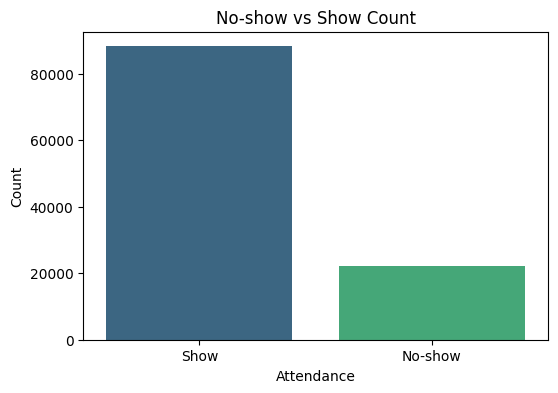

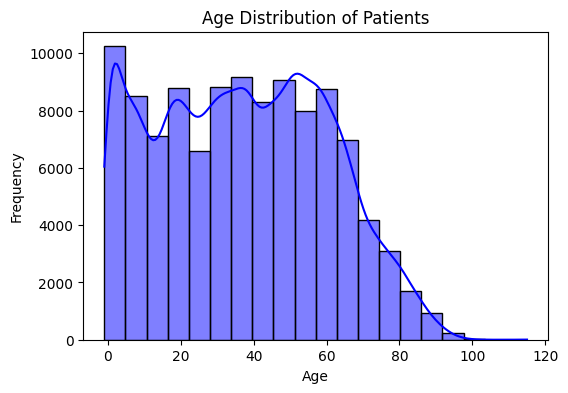

<ipython-input-21-f682b534f5c4>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='No-show', y='WaitingDays', palette='coolwarm')


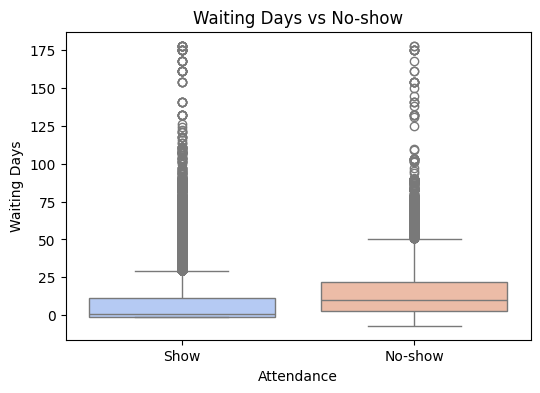

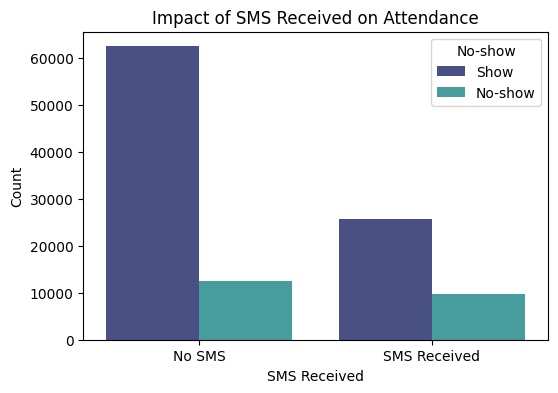

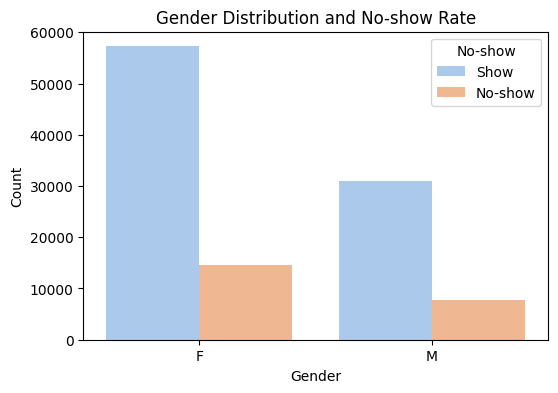

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Basic Information about the Dataset
print("Dataset Overview:")
print(f"Total Records: {data.shape[0]}")
print(f"Total Features: {data.shape[1]}")
print("\nMissing Values per Column:")
print(data.isnull().sum())

# Visualization: Missing Values
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette="Blues_r")
    plt.title("Missing Values per Column")
    plt.xlabel("Columns")
    plt.ylabel("Missing Values")
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Convert date columns to datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Add a new column for waiting time (days between scheduling and appointment)
data['WaitingDays'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Map 'Yes' and 'No' in the 'No-show' column to 1 and 0
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})

# Visualization: No-show Rate
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='No-show', palette='viridis')
plt.title('No-show vs Show Count')
plt.xticks([0, 1], ['Show', 'No-show'])
plt.xlabel('Attendance')
plt.ylabel('Count')
plt.show()

# Visualization: Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization: Waiting Days vs No-show
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='No-show', y='WaitingDays', palette='coolwarm')
plt.title('Waiting Days vs No-show')
plt.xticks([0, 1], ['Show', 'No-show'])
plt.xlabel('Attendance')
plt.ylabel('Waiting Days')
plt.show()

# Visualization: SMS Received and No-show Rate
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='SMS_received', hue='No-show', palette='mako')
plt.title('Impact of SMS Received on Attendance')
plt.xticks([0, 1], ['No SMS', 'SMS Received'])
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.legend(title='No-show', labels=['Show', 'No-show'])
plt.show()

# Visualization: Gender and No-show Rate
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='No-show', palette='pastel')
plt.title('Gender Distribution and No-show Rate')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='No-show', labels=['Show', 'No-show'])
plt.show()


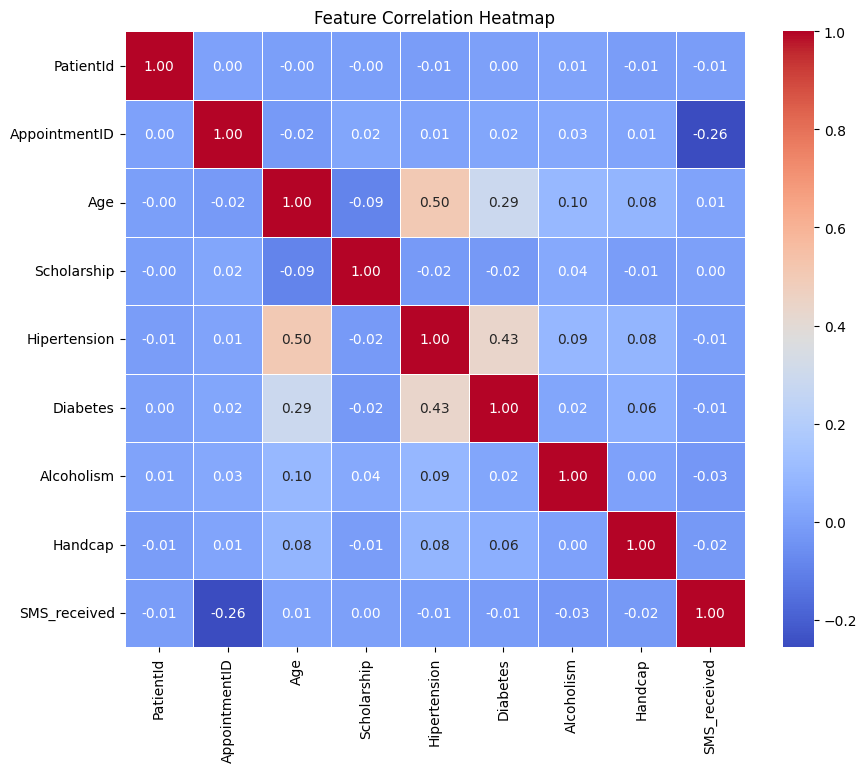

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix on numeric data only
correlation = numeric_data.corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#**After Applying Ethics (Fatimah)**


## SMOTE

In [ ]:
# Necessary Modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, precision_score, recall_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

# Check GPU Availability
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and being used by TensorFlow.")
else:
    print("GPU not available. Check runtime settings.")

# Read the Data
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Verify and Remove Patient Identifiers
print("Initial Columns in Dataset:")
print(data.columns)

# Remove identifiable columns
if 'PatientId' in data.columns:
    data = data.drop('PatientId', axis=1)
    print("PatientId removed for privacy protection.")
else:
    print("PatientId not found in the dataset.")

if 'AppointmentID' in data.columns:
    data = data.drop('AppointmentID', axis=1)
    print("AppointmentID removed for privacy protection.")
else:
    print("AppointmentID not found in the dataset.")

# Check for other potential identifiers
potential_identifiers = ['Name', 'Address', 'PhoneNumber', 'Email', 'SSN']
for col in potential_identifiers:
    if col in data.columns:
        print(f"Warning: {col} column is still present and may compromise privacy.")
    else:
        print(f"{col} column is not present.")

# Preprocessing
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
data = data.drop(['ScheduledDay', 'AppointmentDay'], axis=1)

# Map 'Yes' and 'No' to 1 and 0 for 'No-show'
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})

# One-hot encoding for categorical columns
data = pd.get_dummies(data, columns=['Gender', 'Neighbourhood'], prefix=['Gender', 'Neighbourhood'])

# Handle missing values in Age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Splitting Data
X = data.drop('No-show', axis=1)
y = data['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale Features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Define Neural Network Model
MDL = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
MDL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
MDL.fit(X_train_balanced, y_train_balanced, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the Model
loss, accuracy = MDL.evaluate(X_test, y_test)
print("Loss Value:", loss)
print("Accuracy Score:", accuracy)

# Predictions
y_pred_prob = MDL.predict(X_test).flatten()

# Determine Optimal Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold based on F1-Score:", optimal_threshold)

# Adjust Predictions with Optimal Threshold
y_pred_adjusted = (y_pred_prob > optimal_threshold).astype(int)

# Confusion Matrix and Metrics
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
print("Confusion Matrix:\n", conf_matrix)
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Additional Metrics
f1 = f1_score(y_test, y_pred_adjusted)
roc_auc = roc_auc_score(y_test, y_pred_prob)
precision_value = precision_score(y_test, y_pred_adjusted)
recall_value = recall_score(y_test, y_pred_adjusted)

print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Precision:", precision_value)
print("Recall:", recall_value)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU is available and being used by TensorFlow.
Initial Columns in Dataset:
Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')
PatientId removed for privacy protection.
AppointmentID removed for privacy protection.
Name column is not present.
Address column is not present.
PhoneNumber column is not present.
Email column is not present.
SSN column is not present.


<ipython-input-27-5ec17e8d47d2>:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4409/4409 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7779 - loss: 0.4490 - val_accuracy: 0.7947 - val_loss: 0.4932
Epoch 2/15
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8031 - loss: 0.3926 - val_accuracy: 0.7920 - val_loss: 0.5181
Epoch 3/15
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8055 - loss: 0.3834 - val_accuracy: 0.7866 - val_loss: 0.5042
Epoch 4/15
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8073 - loss: 0.3758 - val_accuracy: 0.7914 - val_loss: 0.4846
Epoch 5/15
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8094 - loss: 0.3734 - val_accuracy: 0.7949 - val_loss: 0.5015
Epoch 6/15
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8102 - loss: 0.3706 - val_accuracy: 0.7925 - val_loss: 0.4995
Epoch 7/15
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8103 - loss: 0.3683 - val_accuracy: 0.7738 - val_loss: 0.4794
Epoch 8/15
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8123 - loss: 0.3681 - val_accura

## Improve  ADASYN

<ipython-input-3-67af93c5c951>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['Age'].fillna(processed_data['Age'].median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6797 - loss: 0.5777 - val_accuracy: 0.6890 - val_loss: 0.5477
Epoch 2/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7108 - loss: 0.5226 - val_accuracy: 0.6461 - val_loss: 0.5716
Epoch 3/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7150 - loss: 0.5183 - val_accuracy: 0.6590 - val_loss: 0.5733
Epoch 4/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7170 - loss: 0.5156 - val_accuracy: 0.6477 - val_loss: 0.5493
Epoch 5/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7182 - loss: 0.5145 - val_accuracy: 0.6718 - val_loss: 0.5403
Epoch 6/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7213 - loss: 0.5111 - val_accuracy: 0.6564 - val_loss: 0.5482
Epoch 7/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7202 - loss: 0.5094 - val_accuracy: 0.6474 - val_loss: 0.5752
Epoch 8/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7209 - loss: 0.5089 -

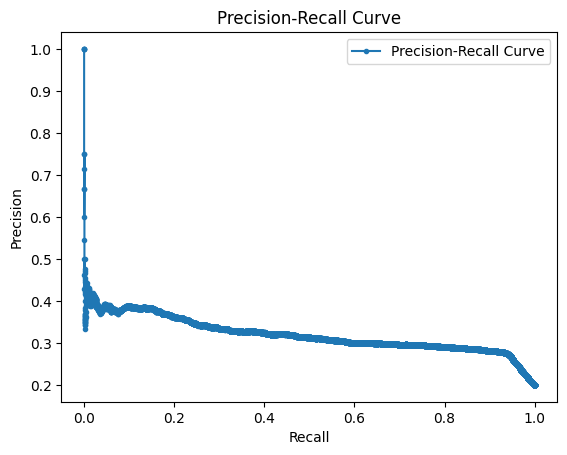

In [ ]:
# Install necessary modules
!pip install imbalanced-learn --quiet
!pip install matplotlib --quiet

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, precision_score, recall_score, precision_recall_curve
from imblearn.over_sampling import ADASYN
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# Load Dataset
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Preprocess Data
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
processed_data = data.drop(['PatientId', 'AppointmentID'], axis=1)

# Calculate Time Difference between appointment dates
processed_data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Drop datetime columns after extracting the required information
processed_data = processed_data.drop(['ScheduledDay', 'AppointmentDay'], axis=1)

# Map 'Yes' and 'No' to 1 and 0 respectively for target column
processed_data['No-show'] = processed_data['No-show'].map({'Yes': 1, 'No': 0})

# Encode 'Neighbourhood' with label encoding (pseudonymization)
label_encoder = LabelEncoder()
processed_data['Neighbourhood_encoded'] = label_encoder.fit_transform(processed_data['Neighbourhood'])
processed_data = processed_data.drop('Neighbourhood', axis=1)

# Create dummy variables for categorical column 'Gender'
processed_data = pd.get_dummies(processed_data, columns=['Gender'], prefix=['Gender'])

# Fill missing values in Age with the median value
processed_data['Age'].fillna(processed_data['Age'].median(), inplace=True)

# Define features (X) and target (y)
X = processed_data.drop('No-show', axis=1)
y = processed_data['No-show']

# Split Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN for Class Imbalance Handling
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Define Neural Network Model
MDL = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
MDL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = MDL.fit(X_train_balanced, y_train_balanced, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = MDL.evaluate(X_test, y_test)
print("Loss Value:", loss)
print("Accuracy Score:", accuracy)

# Predictions
y_pred_prob = MDL.predict(X_test).flatten()

# Determine optimal threshold using Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold based on F1-Score:", optimal_threshold)

# Adjust predictions based on optimal threshold
y_pred_adjusted = (y_pred_prob > optimal_threshold).astype(int)

# Evaluate model performance with confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
print("Confusion Matrix:\n", conf_matrix)

# False positive and negative analysis
print(f"False Positives: {fp}, False Negatives: {fn}")

# Additional Metrics
f1 = f1_score(y_test, y_pred_adjusted)
roc_auc = roc_auc_score(y_test, y_pred_prob)
precision_score_value = precision_score(y_test, y_pred_adjusted)
recall_score_value = recall_score(y_test, y_pred_adjusted)

print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Precision:", precision_score_value)
print("Recall:", recall_score_value)

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


## Transparency Tools



### SHAP

In [ ]:
# Necessary Modules for SHAP
!pip install shap --quiet

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, f1_score
import tensorflow as tf
import pandas as pd
import numpy as np
import shap  # SHAP for interpretability
import matplotlib.pyplot as plt

# Load Dataset
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Preprocess Data
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
data = data.drop(['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID'], axis=1)

# Map 'Yes' and 'No' to 1 and 0 for 'No-show'
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})

# Encode 'Neighbourhood' and 'Gender'
label_encoder = LabelEncoder()
data['Neighbourhood_encoded'] = label_encoder.fit_transform(data['Neighbourhood'])
data = pd.get_dummies(data, columns=['Gender'], prefix=['Gender'])
data = data.drop('Neighbourhood', axis=1)

# Handle missing values in Age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Define features and target
X = data.drop('No-show', axis=1)
y = data['No-show']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Class Imbalance with ADASYN
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Scale Features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Convert X_test to DataFrame for interpretability
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Define Neural Network Model
MDL = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
MDL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = MDL.fit(X_train_balanced, y_train_balanced, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the Model
loss, accuracy = MDL.evaluate(X_test, y_test)
print("Loss Value:", loss)
print("Accuracy Score:", accuracy)

# Predictions
y_pred_prob = MDL.predict(X_test).flatten()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-21-5d126d6a5f18>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4379/4379 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6765 - loss: 0.5800 - val_accuracy: 0.6445 - val_loss: 0.5577
Epoch 2/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7129 - loss: 0.5221 - val_accuracy: 0.6775 - val_loss: 0.5422
Epoch 3/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7172 - loss: 0.5172 - val_accuracy: 0.6391 - val_loss: 0.5579
Epoch 4/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7174 - loss: 0.5155 - val_accuracy: 0.6757 - val_loss: 0.5435
Epoch 5/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7197 - loss: 0.5113 - val_accuracy: 0.6481 - val_loss: 0.5525
Epoch 6/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7190 - loss: 0.5121 - val_accuracy: 0.6577 - val_loss: 0.5550
Epoch 7/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7207 - loss: 0.5111 - val_accuracy: 0.6497 - val_loss: 0.5605
Epoch 8/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7191 - loss: 0.5102 - val_accura

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


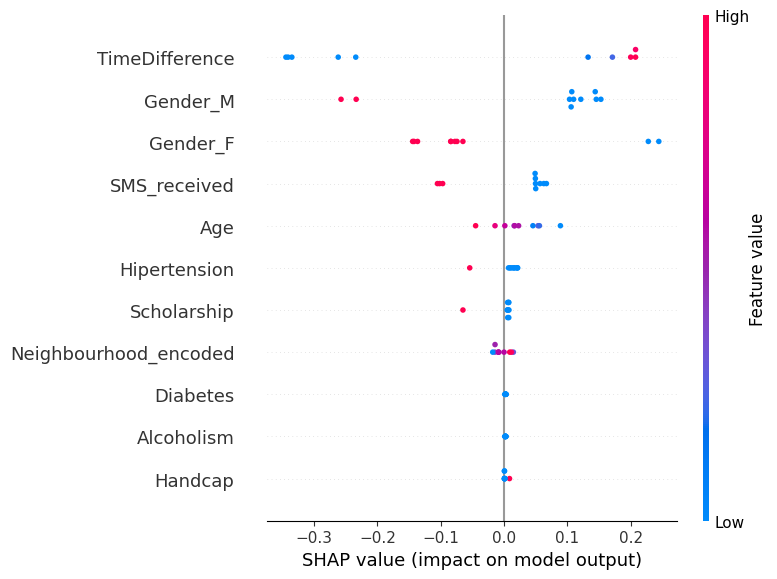

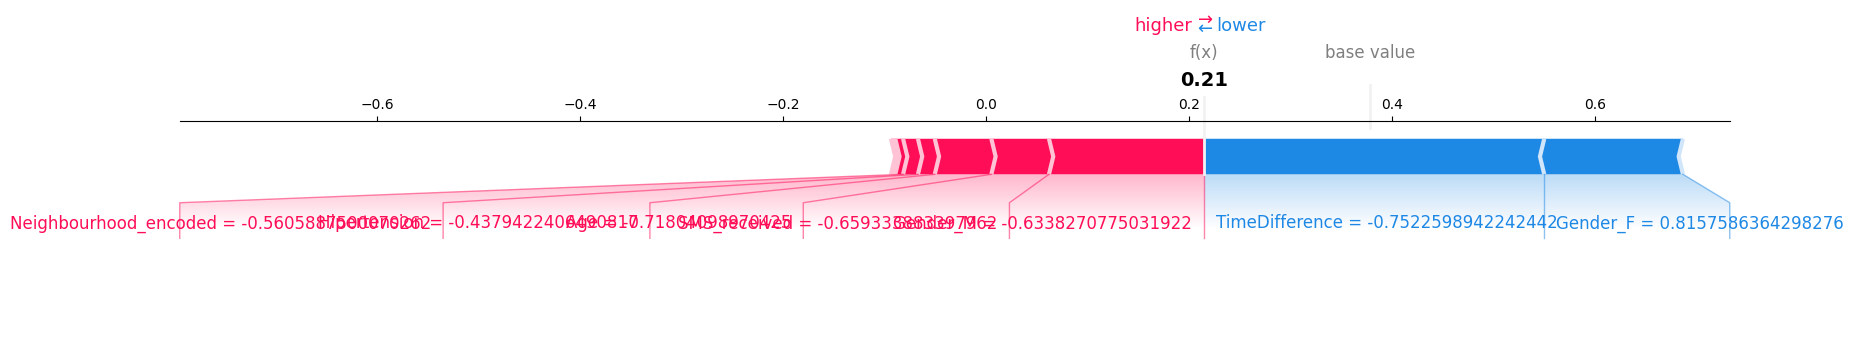

In [ ]:
# SHAP Integration
# Define a prediction function for SHAP
def predict_fn(data):
    return MDL.predict(data).flatten()

# Initialize SHAP KernelExplainer with training data
explainer = shap.KernelExplainer(predict_fn, X_train_balanced[:100])  # Use a small subset for efficiency

# Compute SHAP values for the first 10 test samples
shap_values = explainer.shap_values(X_test[:10])

# Visualize SHAP Values
# Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_test_df[:10], feature_names=X.columns)

# Force Plot (Single Instance Explanation)
# Use the first instance from the test set
shap.force_plot(explainer.expected_value, shap_values[0], X_test_df.iloc[0, :], matplotlib=True)

### LIME

In [ ]:
# Install LIME
!pip install lime --quiet

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, f1_score
from imblearn.over_sampling import ADASYN
import tensorflow as tf
import pandas as pd
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Preprocess Data (matching your final preprocessing pipeline)
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
data = data.drop(['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID'], axis=1)

# Map 'Yes' and 'No' to 1 and 0 for 'No-show'
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})

# Encode 'Neighbourhood' and 'Gender'
label_encoder = LabelEncoder()
data['Neighbourhood_encoded'] = label_encoder.fit_transform(data['Neighbourhood'])
data = pd.get_dummies(data, columns=['Gender'], prefix=['Gender'])
data = data.drop('Neighbourhood', axis=1)

# Handle missing values in Age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Define features and target
X = data.drop('No-show', axis=1)
y = data['No-show']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Class Imbalance with ADASYN
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Scale Features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Convert X_test to DataFrame for interpretability
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Define Neural Network Model
MDL = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
MDL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = MDL.fit(X_train_balanced, y_train_balanced, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the Model
loss, accuracy = MDL.evaluate(X_test, y_test)
print("Loss Value:", loss)
print("Accuracy Score:", accuracy)

# Define Prediction Function for LIME
def predict_fn(data):
    prob_1 = MDL.predict(data).flatten()  # Probability of class 1 (Show)
    prob_0 = 1 - prob_1                   # Probability of class 0 (No-show)
    return np.vstack([prob_0, prob_1]).T  # Return [p(0), p(1)]

# Initialize LIME Explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train_balanced,
    feature_names=X.columns.tolist(),
    class_names=['No-show', 'Show'],
    mode='classification'
)

# Generate Explanations for a Single Instance
# Example: Explain the prediction for the first instance in the test set
idx = 0  # Index of the instance to explain
explanation = lime_explainer.explain_instance(
    data_row=X_test[idx],
    predict_fn=predict_fn,
    num_features=len(X.columns)  # Include all features
)

# Visualize Explanation for the Instance
explanation.show_in_notebook(show_table=True)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-23-e9e45734828a>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4379/4379 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6812 - loss: 0.5751 - val_accuracy: 0.6671 - val_loss: 0.5661
Epoch 2/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7148 - loss: 0.5217 - val_accuracy: 0.6738 - val_loss: 0.5429
Epoch 3/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7156 - loss: 0.5191 - val_accuracy: 0.6631 - val_loss: 0.5430
Epoch 4/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7183 - loss: 0.5156 - val_accuracy: 0.6894 - val_loss: 0.5248
Epoch 5/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7169 - loss: 0.5142 - val_accuracy: 0.6505 - val_loss: 0.5609
Epoch 6/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7196 - loss: 0.5096 - val_accuracy: 0.6601 - val_loss: 0.5759
Epoch 7/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7198 - loss: 0.5097 - val_accuracy: 0.6486 - val_loss: 0.5633
Epoch 8/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7207 - loss: 0.5092 - val_accura

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━

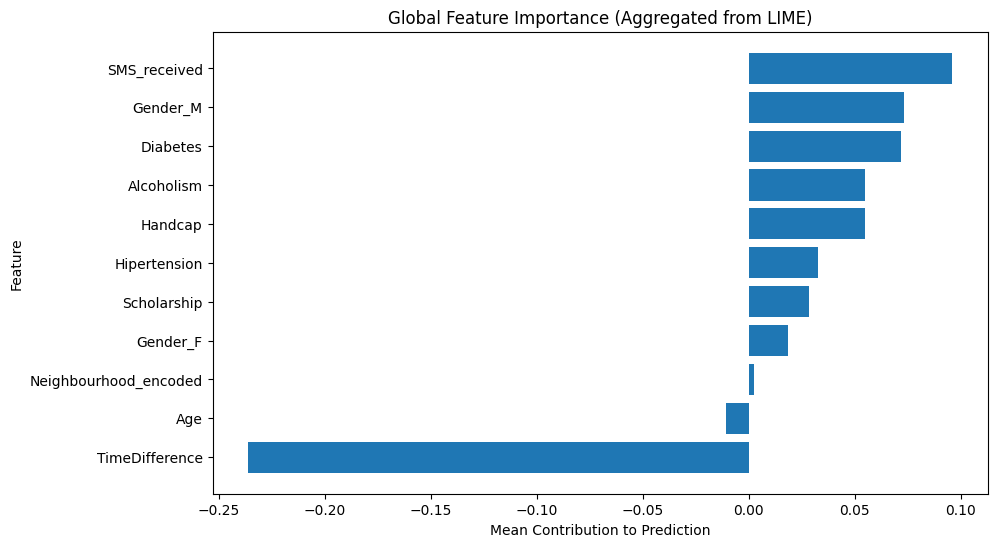

In [ ]:
# Generate Global Feature Importance
num_instances = 50  # Number of instances to analyze for global importance
feature_contributions = {feature: [] for feature in X.columns}  # To store contributions

for i in range(num_instances):
    # Explain the instance
    explanation = lime_explainer.explain_instance(
        data_row=X_test[i],
        predict_fn=predict_fn,
        num_features=len(X.columns)  # Include all features
    )

    # Parse and aggregate contributions
    for label, contribution in explanation.as_list():
        # Extract feature name from label (e.g., "TimeDifference <= -0.70" -> "TimeDifference")
        feature_name = label.split(' ')[0]
        if feature_name in feature_contributions:
            feature_contributions[feature_name].append(contribution)

# Aggregate Contributions
aggregated_contributions = {feature: np.mean(contributions) for feature, contributions in feature_contributions.items()}

# Convert to DataFrame for visualization
contributions_df = pd.DataFrame(list(aggregated_contributions.items()), columns=['Feature', 'Mean Contribution'])
contributions_df.sort_values(by='Mean Contribution', ascending=False, inplace=True)

# Plot Global Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(contributions_df['Feature'], contributions_df['Mean Contribution'], align='center')
plt.xlabel('Mean Contribution to Prediction')
plt.ylabel('Feature')
plt.title('Global Feature Importance (Aggregated from LIME)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#  Transparency AI Tools

## Non- maleficence AI Tool

### Projected Gradient Descent (PGD) Techniques and Tools Used:
Adversarial Robustness Toolbox (ART):

The ART library was used to create adversarial examples and evaluate the model's robustness.
Specifically:
Projected Gradient Descent (PGD) attack was used to generate adversarial examples.
The attack perturbed the test data to make the model misclassify inputs.
Confusion Matrix Analysis:

The confusion matrix was calculated to analyze the performance of the model on adversarial examples.
Metrics such as True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) were extracted.
Accuracy Metrics:

Clean Test Accuracy:
The accuracy of the model on unperturbed test data was calculated to establish a baseline.
PGD Adversarial Accuracy:
The accuracy of the model on adversarial examples was computed to measure its robustness.
Accuracy Drop:
The difference between clean and adversarial accuracy quantified the impact of adversarial attacks on the model.
TensorFlowV2Classifier Wrapper (ART):

The model was wrapped using ART's TensorFlowV2Classifier, enabling it to interface with ART's adversarial attack methods.


In [ ]:
# Install necessary packages
!pip install adversarial-robustness-toolbox tensorflow --quiet

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import ADASYN
import tensorflow as tf
import numpy as np
import pandas as pd
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import ProjectedGradientDescent

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Preprocess Data (matching your latest preprocessing pipeline)
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
data = data.drop(['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID'], axis=1)

# Map 'Yes' and 'No' to 1 and 0 for 'No-show'
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})

# Encode 'Neighbourhood' and 'Gender'
label_encoder = LabelEncoder()
data['Neighbourhood_encoded'] = label_encoder.fit_transform(data['Neighbourhood'])
data = pd.get_dummies(data, columns=['Gender'], prefix=['Gender'])
data = data.drop('Neighbourhood', axis=1)

# Handle missing values in Age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Define features and target
X = data.drop('No-show', axis=1)
y = data['No-show']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Class Imbalance with ADASYN
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Scale Features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Define Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_balanced_scaled.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_balanced_scaled, y_train_balanced, epochs=15, batch_size=32, validation_data=(X_test_scaled, y_test))




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.3 MB/s eta 0:00:00
Mounted at /content/drive


<ipython-input-1-f72eec8396d0>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6827 - loss: 0.5728 - val_accuracy: 0.6795 - val_loss: 0.5424
Epoch 2/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7110 - loss: 0.5215 - val_accuracy: 0.6486 - val_loss: 0.5449
Epoch 3/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7170 - loss: 0.5173 - val_accuracy: 0.6502 - val_loss: 0.5684
Epoch 4/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7180 - loss: 0.5138 - val_accuracy: 0.6409 - val_loss: 0.5750
Epoch 5/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7182 - loss: 0.5125 - val_accuracy: 0.6472 - val_loss: 0.5837
Epoch 6/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7191 - loss: 0.5141 - val_accuracy: 0.6770 - val_loss: 0.5501
Epoch 7/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7205 - loss: 0.5134 - val_accuracy: 0.6670 - val_loss: 0.5464
Epoch 8/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7196 - loss: 0.5109 -

In [ ]:
# Evaluate Clean Accuracy
y_pred_clean = (model.predict(X_test_scaled) > 0.5).astype(int)
clean_accuracy = accuracy_score(y_test, y_pred_clean)
print(f"Clean Test Accuracy: {clean_accuracy:.2f}")

# Wrap the model using ART's TensorFlowV2Classifier
classifier = TensorFlowV2Classifier(
    model=model,
    clip_values=(0, 1),  # Input values are scaled between 0 and 1
    nb_classes=2,        # Binary classification
    input_shape=(X_train_balanced_scaled.shape[1],),
    loss_object=tf.keras.losses.BinaryCrossentropy()
)

# Generate Adversarial Examples with PGD
pgd_attack = ProjectedGradientDescent(estimator=classifier, eps=0.1)  # Epsilon controls attack strength
X_test_pgd = pgd_attack.generate(x=X_test_scaled)

# Evaluate Adversarial Examples
y_pred_pgd = (classifier.predict(X_test_pgd) > 0.5).astype(int)
adversarial_accuracy = accuracy_score(y_test, y_pred_pgd)
print(f"PGD Adversarial Accuracy: {adversarial_accuracy:.2f}")

# Confusion Matrix Analysis
cm_pgd = confusion_matrix(y_test, y_pred_pgd)
tn, fp, fn, tp = cm_pgd.ravel()
print("\nConfusion Matrix (PGD Adversarial Examples):")
print(cm_pgd)
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Robust Accuracy Analysis
accuracy_drop = clean_accuracy - adversarial_accuracy
print(f"Accuracy Drop due to PGD Attack: {accuracy_drop:.2f}")

691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Clean Test Accuracy: 0.62


PGD - Batches: 0it [00:00, ?it/s]

PGD Adversarial Accuracy: 0.39

Confusion Matrix (PGD Adversarial Examples):
[[ 5376 12293]
 [ 1256  3181]]
True Negatives: 5376, False Positives: 12293, False Negatives: 1256, True Positives: 3181
Accuracy Drop due to PGD Attack: 0.23


## Performance Chart

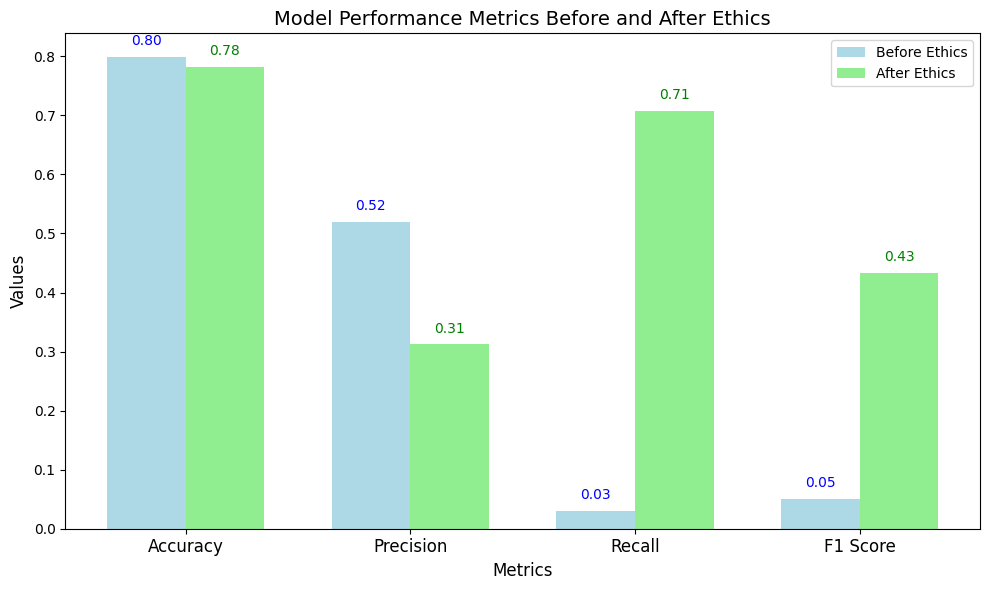

In [ ]:
# Re-import necessary libraries after environment reset
import matplotlib.pyplot as plt
import numpy as np

# Data for metrics before and after applying ethics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
before = [0.799, 0.52, 0.03, 0.05]  # Values Before Ethics
after = [0.782, 0.312, 0.708, 0.433]   # Values After Ethics

# X-axis positions for grouped bars
x = np.arange(len(metrics))

# Bar width
bar_width = 0.35

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, before, width=bar_width, label="Before Ethics", color="#ADD8E6")
plt.bar(x + bar_width / 2, after, width=bar_width, label="After Ethics", color="#90EE90")

# Add labels, title, and legend
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Model Performance Metrics Before and After Ethics", fontsize=14)
plt.xticks(x, metrics, fontsize=12)
plt.legend()

# Annotate the bar values
for i, v in enumerate(before):
    plt.text(i - bar_width / 2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10, color='blue')
for i, v in enumerate(after):
    plt.text(i + bar_width / 2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10, color='green')

# Show plot
plt.tight_layout()
plt.show()


## Responsible AI Toolbox

Covered so far
Model Performance Metrics:

Metrics like accuracy, F1 score, precision, recall, and others are displayed on the dashboard.
Dataset and feature cohorts allow you to analyze performance for different subsets of data.
Error Analysis:

The dashboard enables the exploration of errors across cohorts.
You can identify cohorts where your model struggles the most.
Explanations (Feature Importance):

Feature importance for both global and local explainability using techniques like SHAP or LIME.
These insights help understand the features that most influence model predictions.
Causal Effects:

Causal analysis was computed, which helps identify causal relationships between variables and the outcome.
Counterfactuals:

Counterfactual examples were generated, showing how changes to input data could alter the model’s predictions.
Responsible AI Dashboard Setup:

The dashboard is operational, allowing interaction with all the above aspects in an organized UI.


###Without dashboard

In [ ]:
# Install necessary modules
!pip install imbalanced-learn --quiet
!pip install matplotlib --quiet
!pip install raiwidgets --quiet
!pip install interpret-community --quiet
!pip install --upgrade statsmodels


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.3 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.
  Using cached statsmodels-0.14.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
Using cached statsmodels-0.14.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which i

In [ ]:
!pip uninstall statsmodels
!pip install statsmodels


Found existing installation: statsmodels 0.14.4
Uninstalling statsmodels-0.14.4:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/statsmodels-0.14.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/statsmodels/*
Proceed (Y/n)? t
Your response ('t') was not one of the expected responses: y, n, 
Proceed (Y/n)? y
  Successfully uninstalled statsmodels-0.14.4
  Using cached statsmodels-0.14.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
Using cached statsmodels-0.14.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
responsibleai 0.36.0 requires statsmodels<0.14.0, but you have statsmodels 0.14.4 which is incompatible.


In [ ]:

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, precision_score, recall_score, precision_recall_curve
from imblearn.over_sampling import ADASYN
import tensorflow as tf
import pandas as pd
import numpy as np
from raiwidgets import ResponsibleAIDashboard
from responsibleai import RAIInsights

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Preprocess Data
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
data = data.drop(['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID'], axis=1)

# Map 'Yes' and 'No' to 1 and 0 for 'No-show'
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})

# Encode 'Neighbourhood' and 'Gender'
label_encoder = LabelEncoder()
data['Neighbourhood_encoded'] = label_encoder.fit_transform(data['Neighbourhood'])
data = pd.get_dummies(data, columns=['Gender'], prefix=['Gender'])
data = data.drop('Neighbourhood', axis=1)

# Handle missing values in Age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Define features and target
X = data.drop('No-show', axis=1)
y = data['No-show']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Class Imbalance with ADASYN
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Convert DataFrames for RAI Insights
X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_train_balanced_df['No-show'] = y_train_balanced
X_test_df['No-show'] = y_test

# Scale Features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Define Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_balanced_scaled.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_balanced_scaled, y_train_balanced, epochs=15, batch_size=32, validation_data=(X_test_scaled, y_test))

# Define a custom wrapper for the TensorFlow model
class ModelWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        # Predict class labels (0 or 1)
        probabilities = self.model.predict(X)
        return (probabilities.flatten() > 0.5).astype(int)

    def predict_proba(self, X):
        # Predict probabilities for both classes
        probabilities = self.model.predict(X)
        return np.vstack([1 - probabilities.flatten(), probabilities.flatten()]).T

# Wrap the TensorFlow model
wrapped_model = ModelWrapper(MDL)

# Correct Feature Sets for RAI Insights
X_train_balanced_df['No-show'] = y_train_balanced
X_test_df['No-show'] = y_test

# Limit the test set to 5000 rows for RAIInsights
X_train_balanced_df_features = X_train_balanced_df  # Train with target included
X_test_limited = X_test_df.head(5000)  # Test with target included

# Initialize RAIInsights
rai_insights = RAIInsights(
    model=wrapped_model,
    train=X_train_balanced_df_features,
    test=X_test_limited,
    target_column='No-show',
    task_type='classification',
    classes=[0, 1]
)

# Add explanations
rai_insights.explainer.add()

# Compute insights
rai_insights.compute()

# Save insights to disk
rai_insights.save('./rai_insights/')
print("RAIInsights computation completed successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/15


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


4379/4379 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9924 - loss: 0.0221 - val_accuracy: 1.0000 - val_loss: 1.7730e-06
Epoch 2/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 1.8189e-05 - val_accuracy: 1.0000 - val_loss: 4.1109e-08
Epoch 3/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 1.0000 - loss: 1.2181e-04 - val_accuracy: 1.0000 - val_loss: 6.5117e-08
Epoch 4/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 6.2343e-06 - val_accuracy: 1.0000 - val_loss: 4.4415e-09
Epoch 5/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 1.0000 - loss: 6.7911e-06 - val_accuracy: 1.0000 - val_loss: 2.7498e-05
Epoch 6/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 1.0000 - loss: 2.7665e-06 - val_accuracy: 1.0000 - val_loss: 9.9710e-05
Epoch 7/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 5.4870e-06 - val_accuracy: 1.0000 - val_loss: 3.3946e-12
Epoch 8/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms

Model does not have __setstate__ and __getstate__, pickle may fail


###With Dashboard

In [ ]:
!ngrok authtoken 2q0wmcwjlUrl4ouXTPxgdeQh9Mc_2y5j3RwEDWSy3hCQ3fGEg


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Install necessary libraries
!pip install imbalanced-learn --quiet
!pip install matplotlib --quiet
!pip install raiwidgets responsibleai --quiet
!pip install pyngrok --quiet

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, precision_score, recall_score, precision_recall_curve
from imblearn.over_sampling import ADASYN
import tensorflow as tf
import pandas as pd
import numpy as np
from raiwidgets import ResponsibleAIDashboard
from responsibleai import RAIInsights
from pyngrok import ngrok

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
data = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')

# Preprocess Data
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['TimeDifference'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
data = data.drop(['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID'], axis=1)

# Map 'Yes' and 'No' to 1 and 0 for 'No-show'
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})

# Encode 'Neighbourhood' and 'Gender'
label_encoder = LabelEncoder()
data['Neighbourhood_encoded'] = label_encoder.fit_transform(data['Neighbourhood'])
data = pd.get_dummies(data, columns=['Gender'], prefix=['Gender'])
data = data.drop('Neighbourhood', axis=1)

# Handle missing values in Age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Define features and target
X = data.drop('No-show', axis=1)
y = data['No-show']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Class Imbalance with ADASYN
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Convert DataFrames for RAI Insights
X_train_features = X_train_balanced  # Exclude the target column
X_test_features = X_test  # Exclude the target column

# Scale features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Define Neural Network Model with Correct Input Shape
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_balanced_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_balanced_scaled, y_train_balanced, epochs=15, batch_size=32, validation_data=(X_test_scaled, y_test))

# Custom ModelWrapper for Predictions
class ModelWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        probabilities = self.model.predict(X)
        return (probabilities.flatten() > 0.5).astype(int)

    def predict_proba(self, X):
        probabilities = self.model.predict(X)
        return np.vstack([1 - probabilities.flatten(), probabilities.flatten()]).T

# Wrap the TensorFlow model
wrapped_model = ModelWrapper(model)

# Prepare Data for RAIInsights
X_train_for_rai = pd.DataFrame(X_train_features, columns=X.columns)
X_test_for_rai = pd.DataFrame(X_test_features, columns=X.columns)
X_train_for_rai['No-show'] = y_train_balanced
X_test_for_rai['No-show'] = y_test

# Initialize RAIInsights
rai_insights = RAIInsights(
    model=wrapped_model,
    train=X_train_for_rai,
    test=X_test_for_rai.head(5000),
    target_column='No-show',
    task_type='classification',
    classes=[0, 1]
)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6805 - loss: 0.5749 - val_accuracy: 0.6738 - val_loss: 0.5599
Epoch 2/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7070 - loss: 0.5245 - val_accuracy: 0.6610 - val_loss: 0.5486
Epoch 3/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7154 - loss: 0.5195 - val_accuracy: 0.6485 - val_loss: 0.5488
Epoch 4/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7178 - loss: 0.5134 - val_accuracy: 0.6674 - val_loss: 0.5402
Epoch 5/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7183 - loss: 0.5137 - val_accuracy: 0.6501 - val_loss: 0.5614
Epoch 6/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7201 - loss: 0.5111 - val_accuracy: 0.6497 - val_loss: 0.5812
Epoch 7/15
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7211 - loss: 0.5122 - 

In [ ]:
# Add explanations
rai_insights.explainer.add()

# Compute insights
rai_insights.compute()

# Save insights to disk
rai_insights.save('./rai_insights/')
print("RAIInsights computation completed successfully.")

# Launch the dashboard using ngrok
dashboard = ResponsibleAIDashboard(rai_insights)

Causal Effects
Current Status: Generating Causal Effects.
Current Status: Finished generating causal effects.
Time taken: 0.0 min 2.2382999304682016e-05 sec
Counterfactual
Time taken: 0.0 min 7.650000043213367e-06 sec
Error Analysis
Current Status: Generating error analysis reports.
Current Status: Finished generating error analysis reports.
Time taken: 0.0 min 0.0015429949999088421 sec
Explanations
Current Status: Explaining 11 features
Time taken: 0.0 min 1.3906999811297283e-05 sec
RAIInsights computation completed successfully.
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ResponsibleAI started at http://localhost:8720


In [ ]:
public_url = ngrok.connect(8720)
print(f"Responsible AI Dashboard is live at: {public_url}")

Responsible AI Dashboard is live at: NgrokTunnel: "https://b67a-34-143-226-46.ngrok-free.app" -> "http://localhost:8720"


# AI Privacy Tools: